In [1]:
!pip install pytesseract==0.3.13 -q

# Imports

In [2]:
# Common
import os
import cv2
import numpy as np

# Data Visualization
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# OCR
import pytesseract

# Constants

In [3]:
CHEQUE_IMAGES = '/kaggle/input/cheque-data/cheque_data/images/train/'

# Utils

In [4]:
def get_image_paths(directory, valid_extensions=(".jpg", ".jpeg", ".png", ".bmp", ".gif")):
    image_paths = []
    
    # Iterate over all files in the directory
    for root, dirs, files in os.walk(directory):
        for file in files:
            # Check if file is an image based on its extension
            if file.lower().endswith(valid_extensions):
                # Append the full path of the image file to the list
                image_paths.append(os.path.join(root, file))
    
    return image_paths


def plt_img(image, cmap="gray"):
    """Display an image using matplotlib"""
    plt.imshow(image, cmap)
    plt.axis('on')
    plt.show()

# Step1: Read cheque images

In [5]:
# Read all images
image_paths = get_image_paths(CHEQUE_IMAGES)

# Total samples
len(image_paths)

90

In [6]:
cheque_images = []

for path in image_paths:
    image = plt.imread(path)
    cheque_images.append(image)

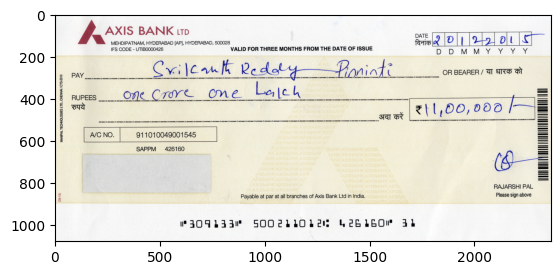

In [7]:
plt_img(cheque_images[0])

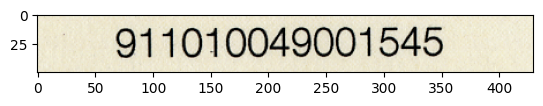

Extracted Account Number: 911010049001545



In [8]:
test_img = cheque_images[0]

account_number = test_img[550:600,320:750] #height, width
plt_img(account_number)

extracted_account_number = pytesseract.image_to_string(
    cv2.cvtColor(account_number, cv2.COLOR_BGR2GRAY)
)
print(f"Extracted Account Number: {extracted_account_number}")

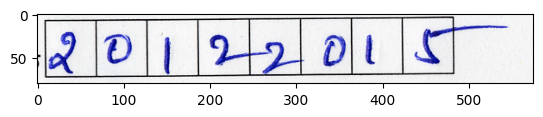

In [9]:
date = test_img[80:160,1790:]
plt_img(date)

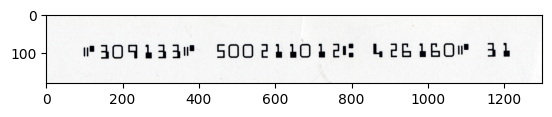

Extracted MICR Number: 309233" SOOfL~IOCN GAEABOW 4h



In [10]:
micr_number = test_img[900:,500:1800]
plt_img(micr_number)

extracted_micr_number = pytesseract.image_to_string(
    cv2.cvtColor(micr_number, cv2.COLOR_BGR2GRAY)
)
print(f"Extracted MICR Number: {extracted_micr_number}")

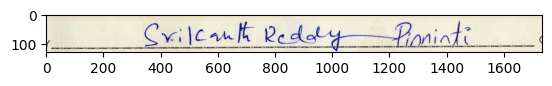

In [11]:
payee_name = test_img[190:320,124:1858]
plt_img(payee_name)